In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import eden
import matplotlib.pyplot as plt
from eden.util import configure_logging
import logging

In [ ]:
from copy import deepcopy
import numpy as np
size_test=20
dataset_a='RF00005.fa'
dataset_a='RF01725.fa'
dataset_b='RF00162.fa'
sizes=[7,8,9,10,11,12,13,14,15]
sizes=[7,8]
repeats=1

# calc everything
def get_results():
    li = [ get_datapoint(size) for size in sizes ]
    # transpose , should work OO 
    print 'li:',li
    return [list(i) for i in zip(*li)]

from graphlearn import sumsim
# calc for one "size", go over repeats
def get_datapoint(size):
    ra=[]
    rb=[]
    rab=[]
    similarities=[]
    global similarity_scores
    
    for rep in range(repeats):
        train_a,test_a = get_seq_tups(dataset_a,size,size_test)
        train_b,test_b = get_seq_tups(dataset_b,size,size_test)
        a,b,ab,similarity = evaluate_point(train_a,train_b,test_a,test_b)
        ra.append(a)
        rab.append(ab)
        rb.append(b)
        similarities.append(similarity)

    similarity_scores.append( (sum(similarities)/float(len(similarities))))
    return ra,rb,rab


def evaluate_point(train_a,train_b,test_a,test_b):
    res=[]
    res.append(  test(deepcopy(train_a),deepcopy(train_b),deepcopy(test_a),deepcopy(test_b)) )
    train_aa = fit_sample(train_a)
    train_bb = fit_sample(train_b)
    
    eins=sumsim.calcsimset(deepcopy(train_aa),deepcopy(train_a))   
    zwei=sumsim.calcsimset(deepcopy(train_bb),deepcopy(train_b))   
    drei = (eins+zwei)/2.0
    res.append(  test(deepcopy(train_aa),deepcopy(train_bb),deepcopy(test_a),deepcopy(test_b)) )
    res.append(  test(deepcopy(train_a)+deepcopy(train_aa),deepcopy(train_b)+train_bb,deepcopy(test_a),deepcopy(test_b)) )
    res.append(drei)
    return res



### just evaluate 
from sklearn.linear_model import SGDClassifier
from eden.path import Vectorizer

def train_esti(neg,pos):
        v=Vectorizer()
        matrix=v.transform(neg+pos)
        res=SGDClassifier(shuffle=True)
        res.fit(matrix, np.asarray(  [-1]*len(neg)+[1]*len(pos)  ) )
        return res

def eva(esti,ne,po):
    v=Vectorizer()
    matrix=v.transform(ne)
    correct= sum(  [1 for res in esti.predict(matrix) if res == -1] ) 
    matrix2=v.transform(po)            
    correct+= sum(  [1 for res in esti.predict(matrix2) if res == 1] )
    return correct

def test(a,b,ta,tb):
    est=train_esti(a,b)
    correct=eva(est,ta,tb)
    return correct/float(size_test*2) # fraction correct
    

global similarity_scores
similarity_scores=[]
r=get_results()

In [ ]:
def levenshtein(s1, s2):
    if len(s1) < len(s2):
        return levenshtein(s2, s1)
    # len(s1) >= len(s2)
    if len(s2) == 0:
        return len(s1)
    previous_row = range(len(s2) + 1)
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1 # j+1 instead of j since previous_row and current_row are one character longer
            deletions = current_row[j] + 1       # than s2
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row
    return previous_row[-1]


def sim(s1,s2):
    l = float( max(len(s1),len(s2))) 
    lp = l - float(levenshtein(s1,s2))
    return lp/l 


print 'testing sim eq', sim(s1[0],s1[0])
print 'testing sim dif', sim(s2[0],s1[0])

s1=['asdasd','asdasd','abc']
s2=['zxczxc','asdasd','abc']


def simsum(a,b,del_diag=False):
    res=0.0
    for i, ea in enumerate(a):
        for j, eb in enumerate(b):
            if del_diag and i==j:
                continue
            res+=simmilarity(ea,eb)
    return res


print 'testing simsum eq',simsum(s1,s1,True)
print 'testing simsum neq',simsum(s2,s1)

import math
def calcsimset(a,b):
    print 'calcsimset'
    ab=simsum(s1,s2,False)
    aa=simsum(a,a,False) 
    bb=simsum(b,b,False)
    print ab,aa,bb
    cc=aa*bb
    print cc
    print ab/math.sqrt(cc)

    
calcsimset(s1,s2)

In [ ]:
def get_datapoint(size):
    ra=[]
    rb=[]
    rab=[]
    similarities=[]
    global similarity_scores
    for rep in range(repeats):

        a,b,ab,similarity = evaluate_point(size)
        ra.append(a)
        rab.append(ab)
        rb.append(b)
        similarities.append(similarity)
        
    similarity_scores.append( 
        (sum(similarities)/float(len(similarities)))
        )
    return ra,rb,rab

In [ ]:
def evaluate_point(size):
    res=[]

    train_aa,train_a,test_a = get_trainthings(size,dataset_a)
    train_bb,train_b,test_b = get_trainthings(size,dataset_b)


    res.append(  
        test(deepcopy(train_a),deepcopy(train_b),deepcopy(test_a),deepcopy(test_b)) 
    )
    eins=sumsim.simset(deepcopy(train_aa),deepcopy(train_a))
    zwei=sumsim.simset(deepcopy(train_bb),deepcopy(train_b)) 
    drei = (eins+zwei)/2.0
    res.append(  test(deepcopy(train_aa),deepcopy(train_bb),deepcopy(test_a),deepcopy(test_b)) )
    res.append(  test(deepcopy(train_a)+deepcopy(train_aa),deepcopy(train_b)+train_bb,deepcopy(test_a),deepcopy(test_b)) )
    res.append(drei)
    return res

result = [[[0.2659209094140591, 0.7571608702207282, 0.34952063027220137, 0.34552775746140796, 0.64228561864770528, 0.58917588649345676, 0.63365105505736785], [0.41384830319760951, 0.42307062059924078, 0.39682883766833693, 0.44470637282419273, 0.21599867599881195, 0.47290360889640176, 0.35354189938727959], [0.18350421099725836, 0.44758703196253163, 0.33017515233256972, 0.25742857667839036, 0.2462889451457384, 0.41362901453004763, 0.32157644269390179], [0.52682237375130569, 0.45435258868964956, 0.21427605841036335, 0.1600775306432328, 0.27781092819570391, 0.52482092020470217, 0.34374532307774069]], [[1.0208545267232421, 1.0328418334181697, 1.0260388091884631, 1.0253540707944329, 1.0329570462691584, 1.0297640583601799, 1.0282682015263573], [1.0110374384672396, 1.0123510388064498, 1.0121077494937152, 1.012391197947039, 1.0121059052914094, 1.0112398544746242, 1.0116914828446135], [1.0069732156703297, 1.0062265801986259, 1.0066300817595337, 1.0080690377381334, 1.0077792162327925, 1.007625124

/home/ikea/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'Arial'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


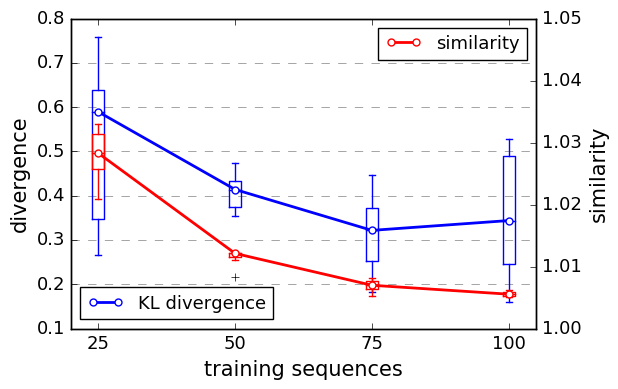

In [5]:
import oneclasscurve  as occ
sizes=[25,50,75,100]
result = [[[0.2659209094140591, 0.7571608702207282, 0.34952063027220137, 0.34552775746140796, 0.64228561864770528, 0.58917588649345676, 0.63365105505736785], [0.41384830319760951, 0.42307062059924078, 0.39682883766833693, 0.44470637282419273, 0.21599867599881195, 0.47290360889640176, 0.35354189938727959], [0.18350421099725836, 0.44758703196253163, 0.33017515233256972, 0.25742857667839036, 0.2462889451457384, 0.41362901453004763, 0.32157644269390179], [0.52682237375130569, 0.45435258868964956, 0.21427605841036335, 0.1600775306432328, 0.27781092819570391, 0.52482092020470217, 0.34374532307774069]], [[1.0208545267232421, 1.0328418334181697, 1.0260388091884631, 1.0253540707944329, 1.0329570462691584, 1.0297640583601799, 1.0282682015263573], [1.0110374384672396, 1.0123510388064498, 1.0121077494937152, 1.012391197947039, 1.0121059052914094, 1.0112398544746242, 1.0116914828446135], [1.0069732156703297, 1.0062265801986259, 1.0066300817595337, 1.0080690377381334, 1.0077792162327925, 1.0076251247491299, 1.00520965035843], [1.0061784869646462, 1.0053022056430467, 1.0062229167141266, 1.0050929887024085, 1.0051299770570208, 1.0055586747637388, 1.0055340744116854]]]
print "result = "+str(result)
print size
a,b= result
occ.plot('123',sizes,a,b)